Проект по ML с Python (зимен семестър 2023/2024) <br/>
Роберт Борисов 62529, Владимир Радев 62530 <br/>
dataset: **Credit Card Dataset for Clustering** <br/>

**Описание на проекта**

Технологиите, които ще използваме за този проект са **Python** и **Jupyter**</br>
Проектът ни е от тип **A**(Избрани са данни от **Kaggle** за клъстеразиционна задача)</br>
По проекта е работено едновременно от дватама(Събиране на едно място,генериране на идея и кодене)


**1.Запознаване с dataseta**

*This dataset belongs to a financial intituition and contains an extensive data on their customers based on their purchasing patterns over past few years . The institution wants to launch a targeted campaign based on the way their customers are divided . We need to find that 'criteria' for division*

DETAILS OF DATASET

1) CUSTID : Identification number of credit card holder

2) BALANCE : Balancing amount left in customer's account

3) BALANCE_FREQUENCY : Frequency of updating balance in account . Score in between 0 and 1 . (0 : not updated frequently and 1 : updated frequently)

4) PURCHASES : Amount of purchases made

5) ONEOFFPURCHASES : Maximum purchases in one go

6) INSTALLMENTS_PURCHASES : Amount of purchase done in one installments

7) CASH_ADVANCE : Cash payments made in advance by the customer

8) PURCHASES_FREQUENCY : Frequency of making purchases .(0 : no purchases and 1 : maximum purchases)

9) ONEOFF_PURCHASES_FREQUENCY : Tells how frequently the purchases are made in one go . (0 : no purchases in one go and 1 : maximum purchases in one go)

10) PURCHASES_INSTALLMENTS_FREQUENCY : frequency of making purchases with installments

11) CASH_ADVANCE_FREQUENCY : frequency of making cash payments in advance

12) CASH_ADVANCE_TRX : number of transactions made with providing cash in advanced

13) PURCHASES_TRX : number of purchases made in transactions

14) CREDIT_LIMIT : limit of the credit card user

15) PAYMENTS : amount of payment made by user

16) MINIMUM_PAYMENTS : least amount of payment made by the user

17) PRC_FULL_PAYMENT : Percentage of credit card payments made by the use in full amount

18) TENURE : time period for user's credit card service **

In [1]:
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

%matplotlib inline

In [2]:
data= pd.read_csv("./credit_cards.csv")
data.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [5]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

**2.Редакция на данните**

**Преглед за Nan стойностите**

In [6]:
data_types = pd.DataFrame(data.dtypes,columns=["DataType"])

data_types["Unique Values"]=data.nunique()

data_types["Null Values"]=data.isnull().sum()

data_types["% null Values"]=data.isnull().sum()/len(data)

data_types.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='PuBu',axis=0)

Виждаме че MINIMUM_PAYMENTS има 313 липсващи стойности и Credit_LIMIT има една липсваща стойност

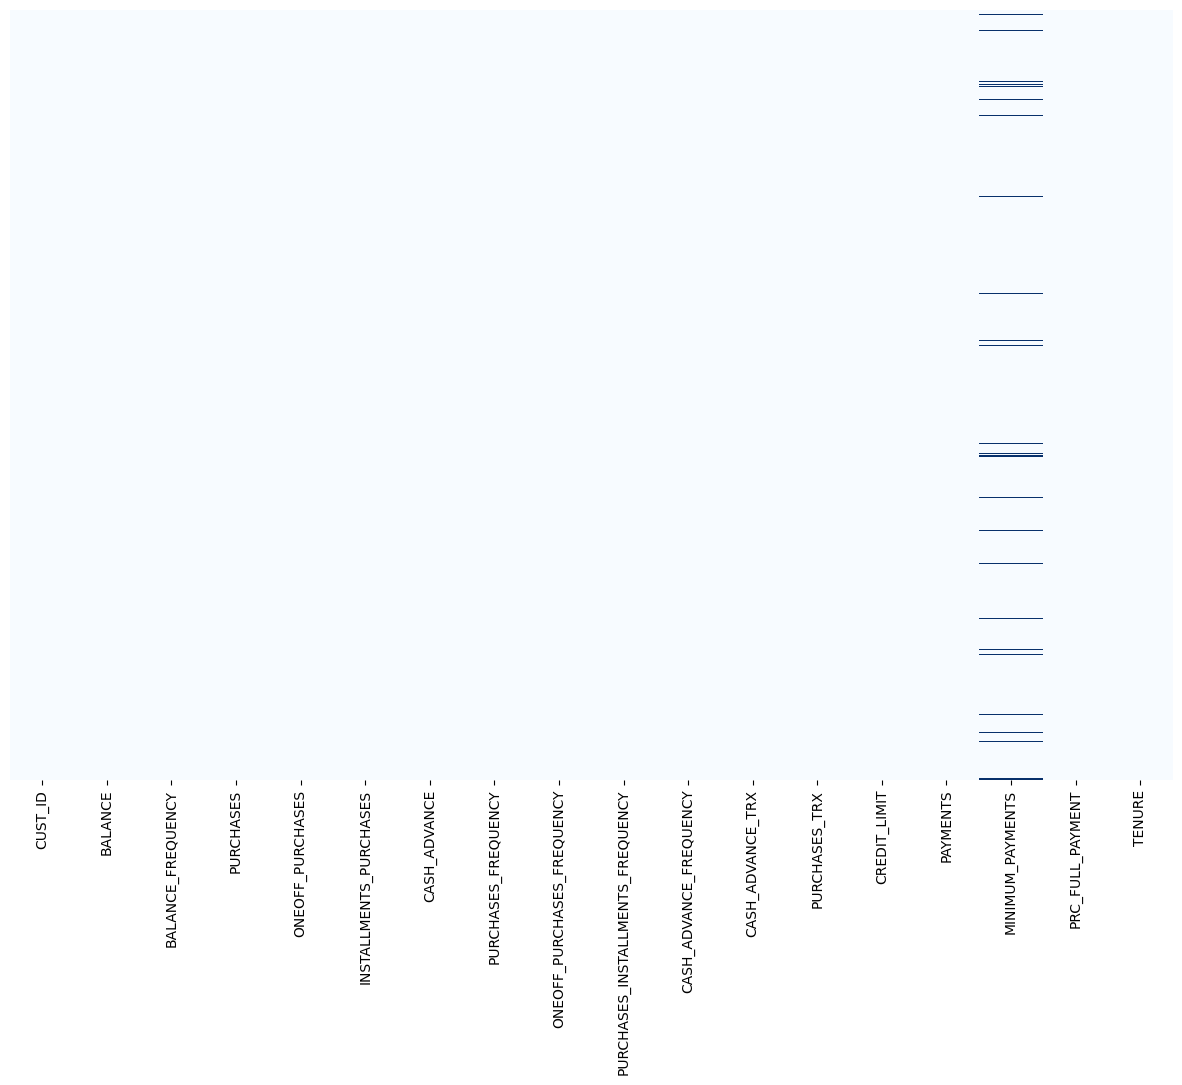

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.isnull(), yticklabels=False, cmap='Blues', cbar=False)
plt.show()

**Премахване на ненужните колони и запълване на липсващите стойности**

<li>CUST_ID представлява ид-то на конкретен картоносител. Но както видяхме от таблицата с липсващите стойности, в този конкретен датасет нямаме два еднакви реда носещи информация за един и същ картоносител, така че тази колона не ни трябва. Махаме я :</li>

In [8]:
data.drop(columns=['CUST_ID'],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<li>Тъй като данните ни съдържат липсващи стойности и ще правим клъстеризация , удобен подход е да използваме KNN Imputer , който ще запълни липсващите стойности с средното на n-те най-близки съседи до него</li>

In [9]:
from sklearn.impute import KNNImputer
columns_with_nulls = data.columns[data.isnull().any()].tolist()
imp = KNNImputer()
data_imp = pd.DataFrame(imp.fit_transform(data[columns_with_nulls]),columns=columns_with_nulls)
data.fillna(data_imp,inplace=True)
print(data[columns_with_nulls].isnull().sum())
print(data.info())


CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TR

**3.EDA**

Нека да проверим какво е разпределението на стойностите в колоните

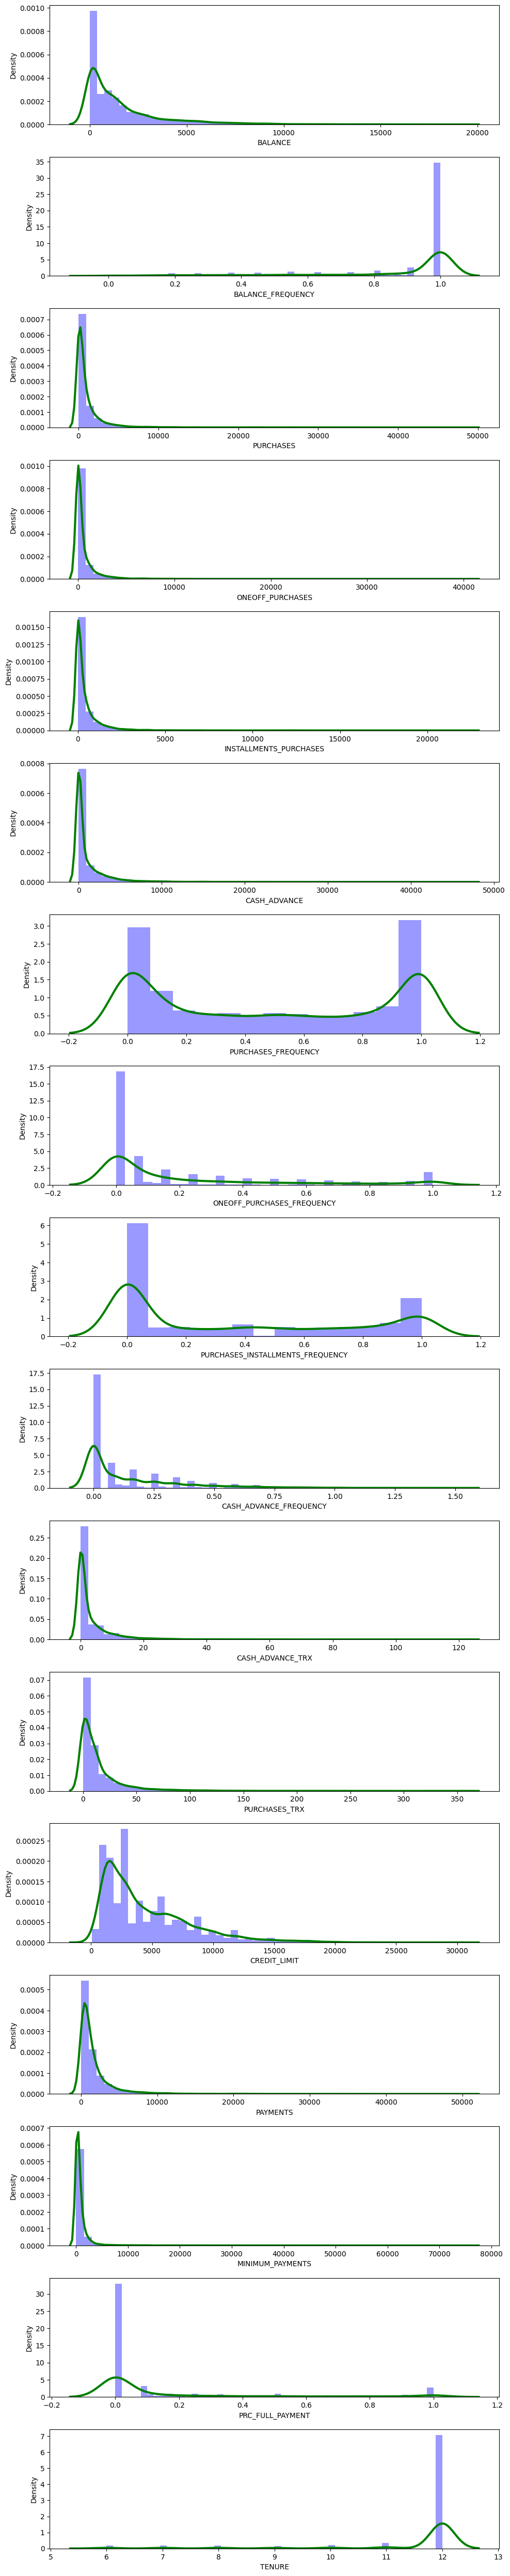

In [10]:
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(figsize=(10, 50))
for i in range(len(data.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(data[data.columns[i]], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})

plt.tight_layout()
plt.show()

<li>Много от колоните имат стойности равни на нулата или близки до нея . Сега ако вземем колоните индикиращи някаква честота:</li>

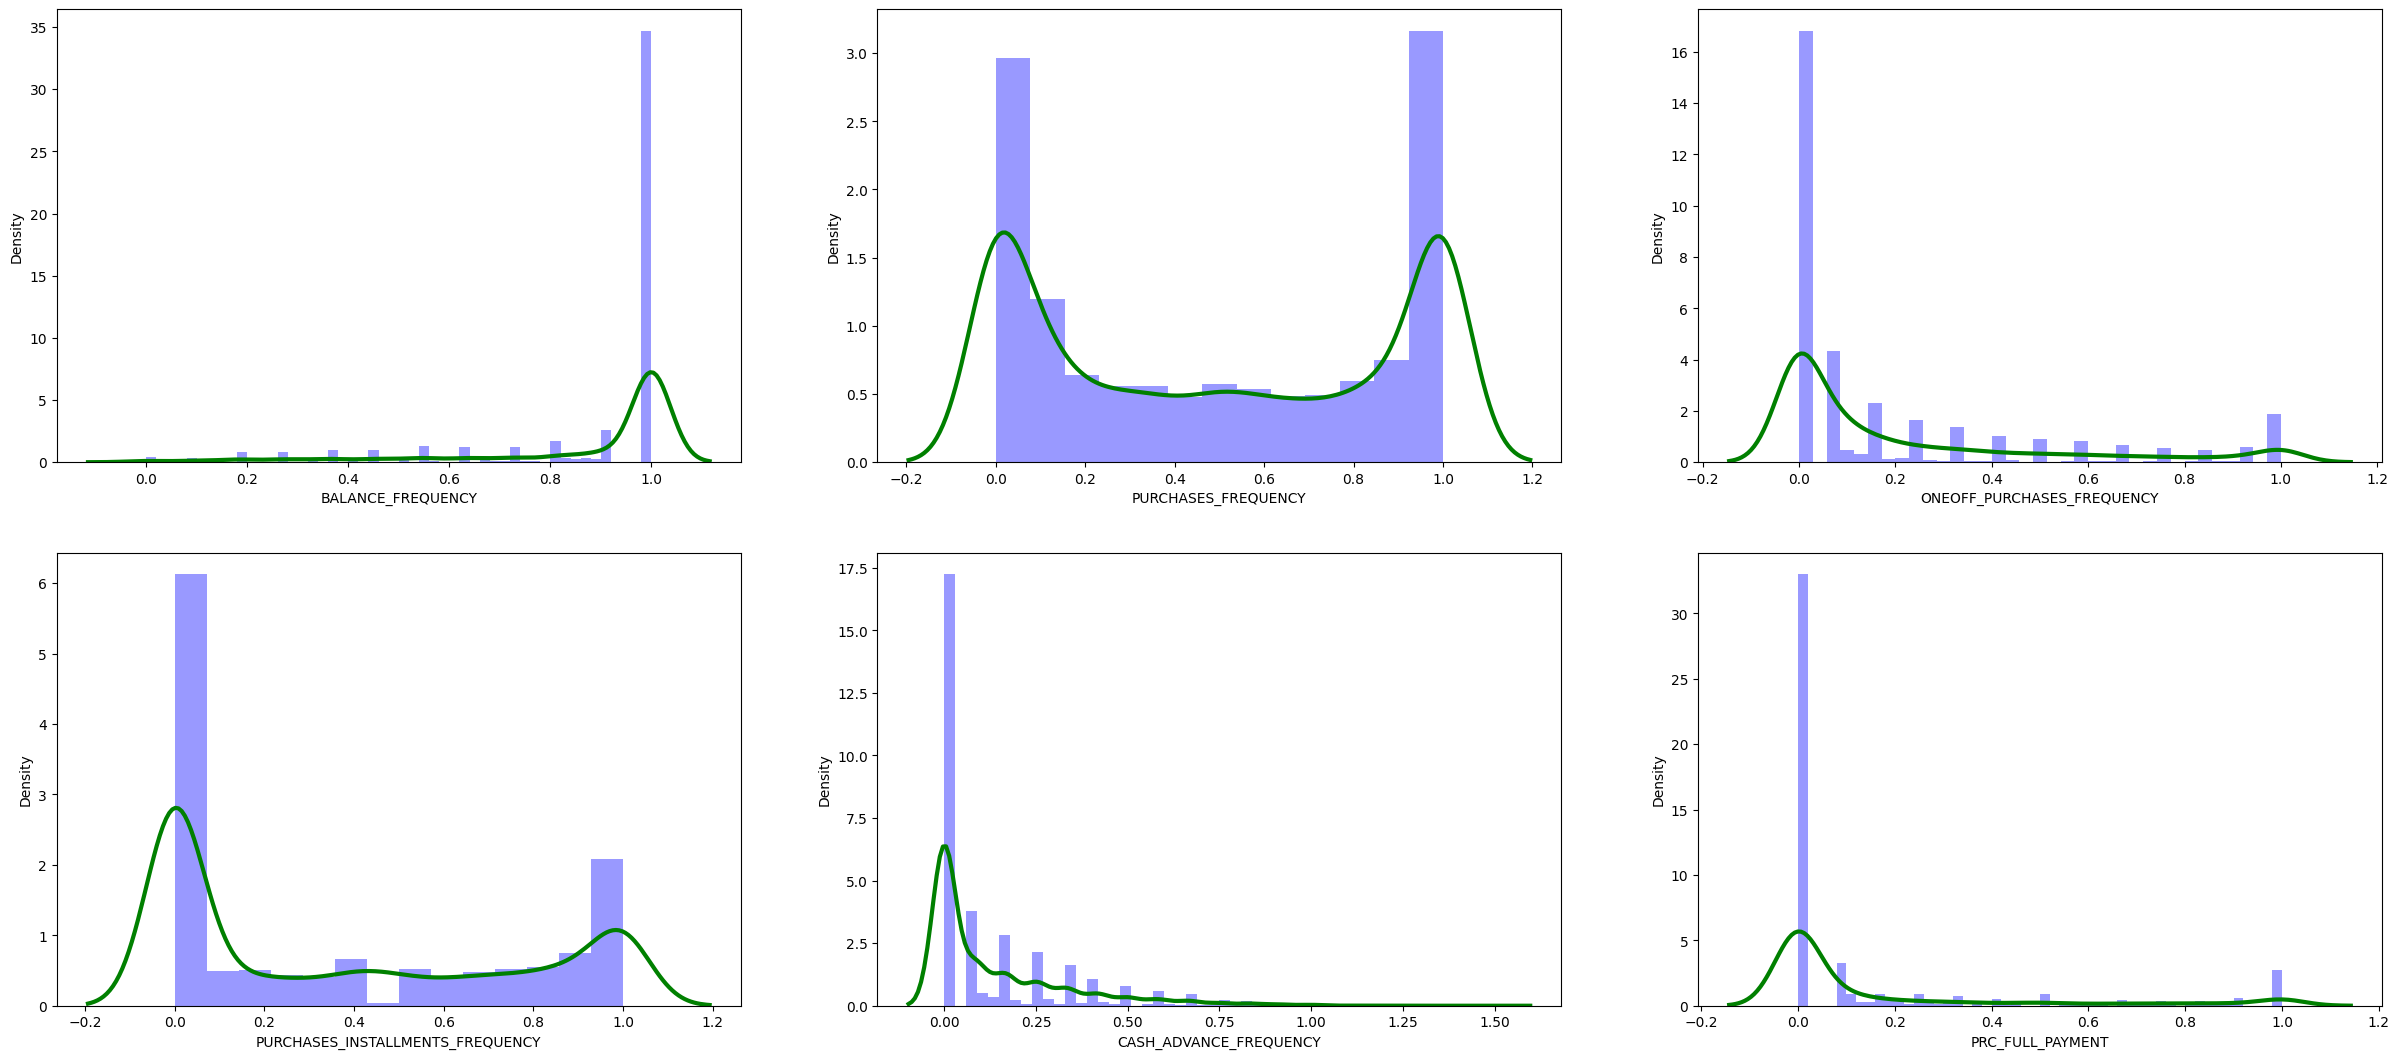

In [11]:
frequance_columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

plt.figure(figsize=(30,20))

for i, col in enumerate(data[frequance_columns]):

        ax = plt.subplot(3, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

<li>BALANCE_FREQUENCY изглежда че не следва тенденцията на другите колони и множеството от примерите са около 1цата</li>

<li>Също така PURCHASES_FREQUENCY има относително равномерно разпределение около 0та и 1цата </li>

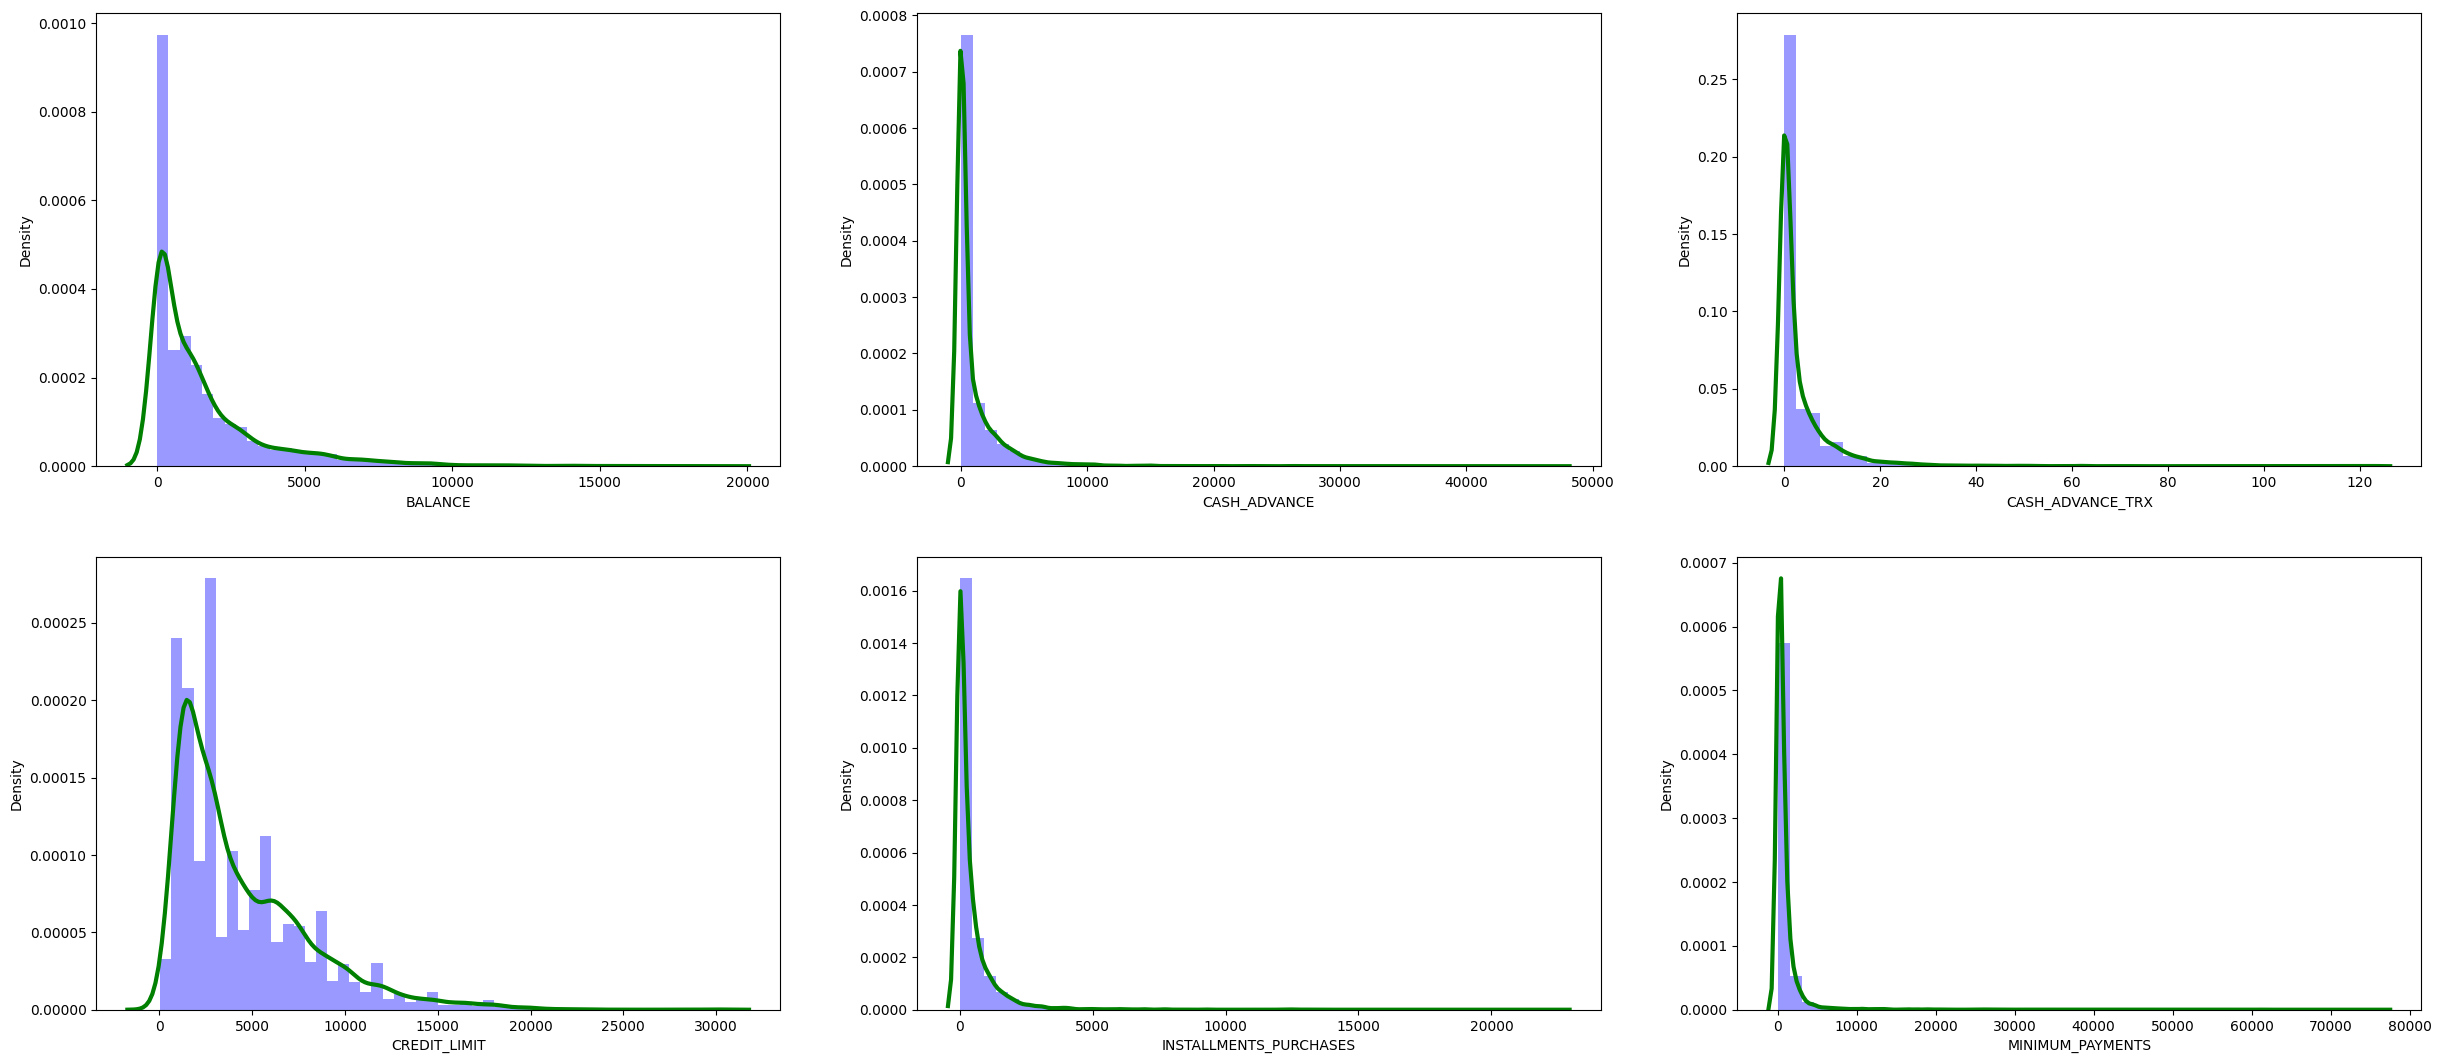

In [12]:
plt.figure(figsize=(30,20))

for i, col in enumerate(data.columns.difference(frequance_columns)[:6]):
        ax = plt.subplot(3, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
X_pca.shape

(569, 30)


(569, 2)

<li>Тези колони също следват тенденцията да са близо до 0лата, като BALANCE и CREDIT_LIMIT имат малко разнообразни стойности по-голями от 0лата</li>

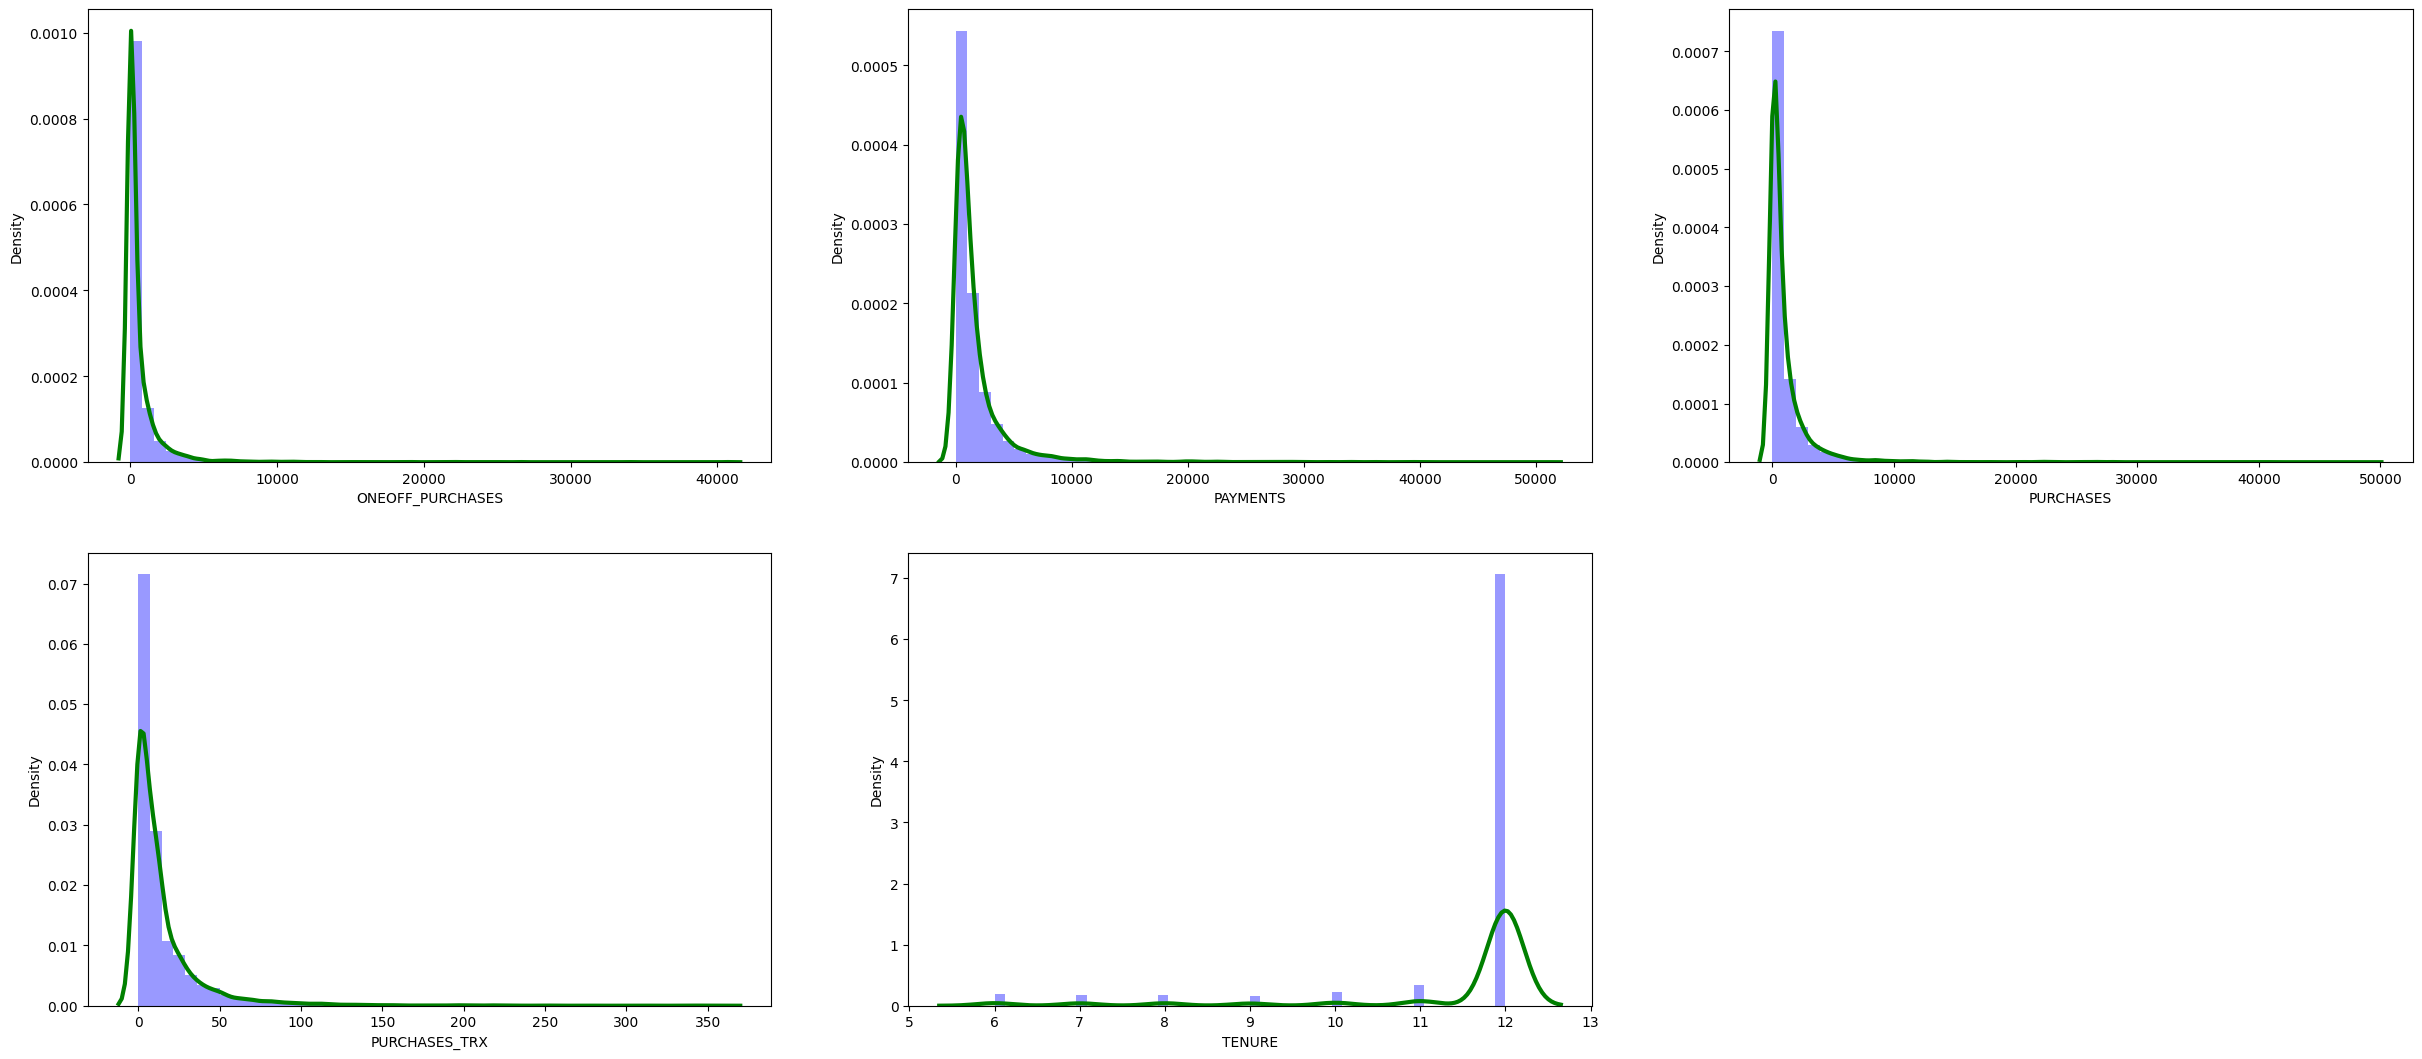

In [14]:
plt.figure(figsize=(30,20))

for i, col in enumerate(data.columns.difference(frequance_columns)[6:]):
        ax = plt.subplot(3, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

<li>Изглежда, че картоносителите са отдавнашни клиенти ( TENTURE) </li>

Нека да разгледаме корелацията между колоните

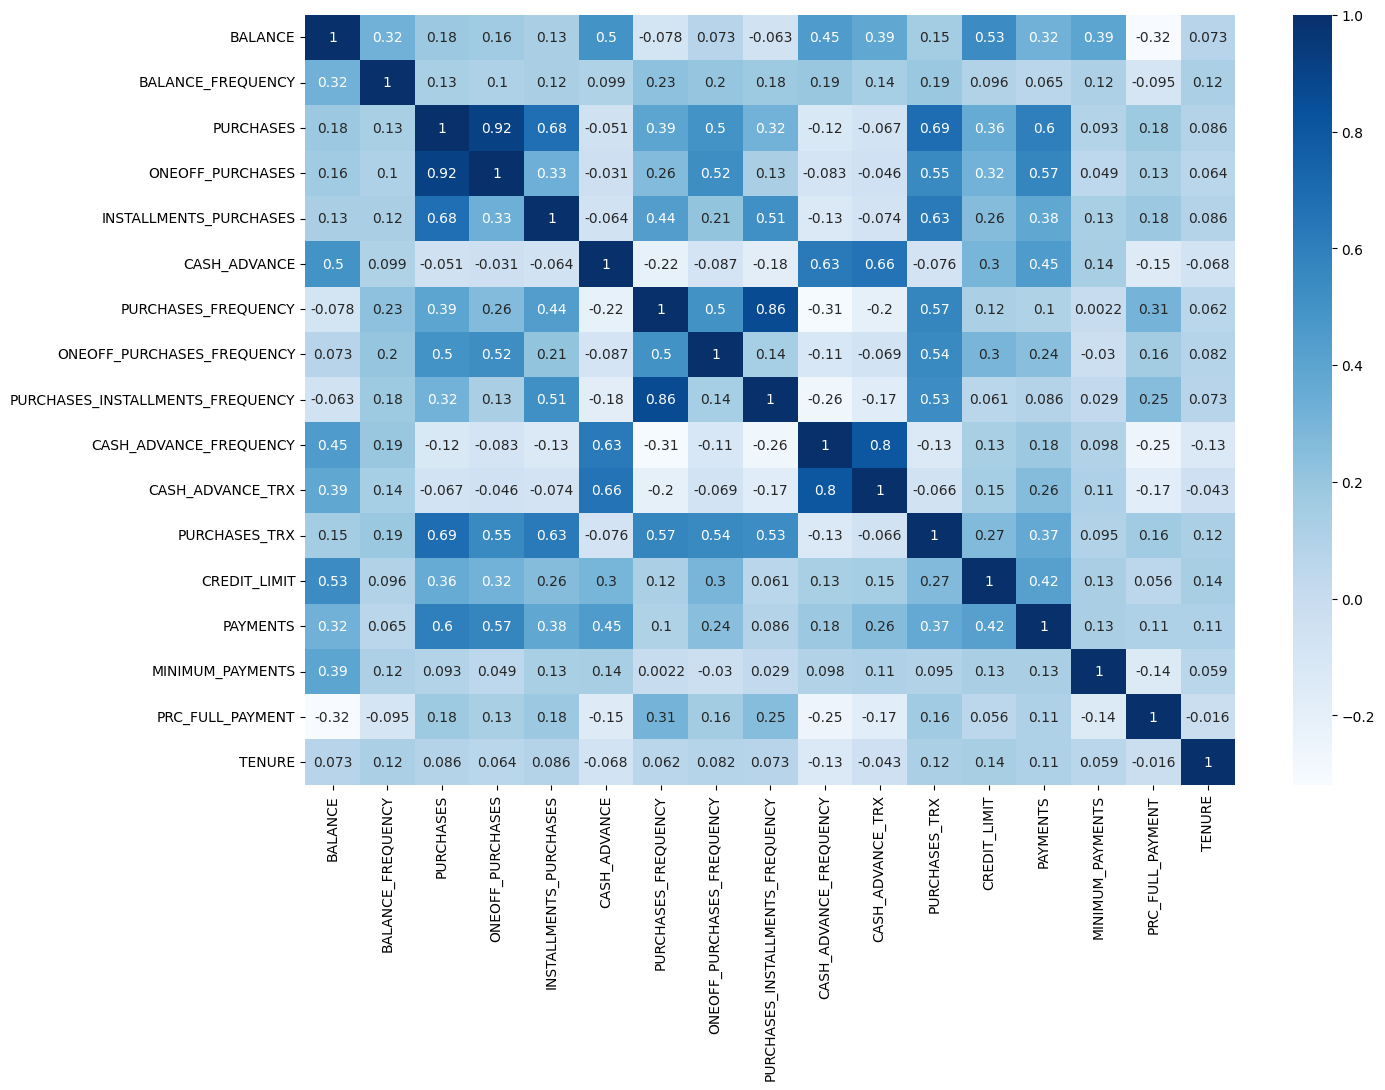

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap( data.corr(), annot=True, cmap='Blues');

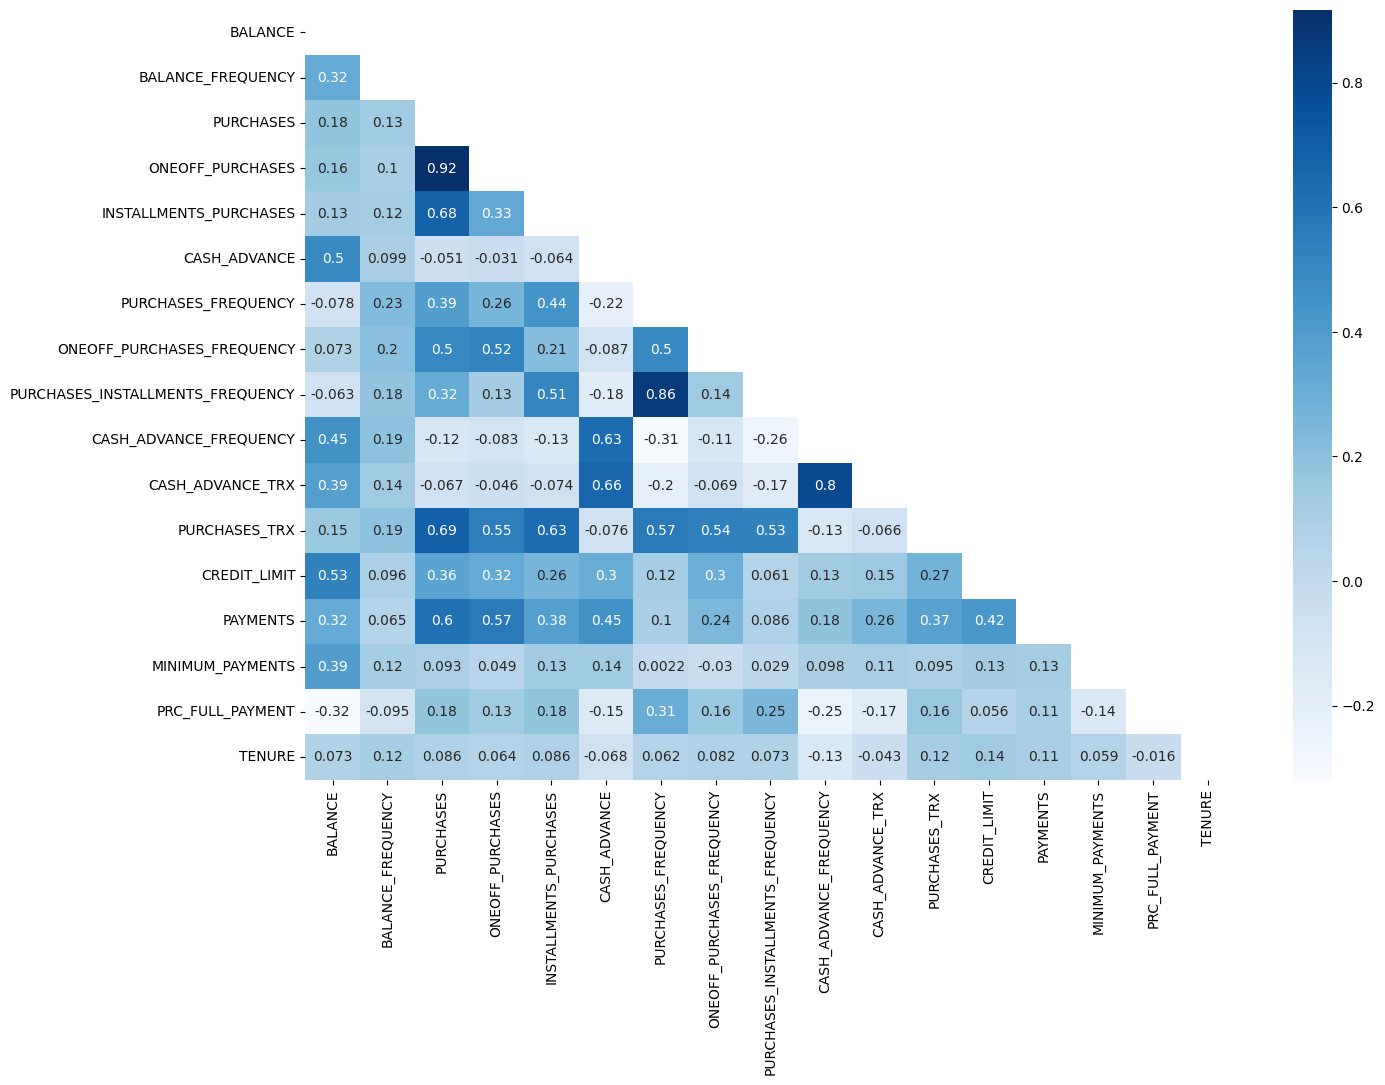

In [16]:
plt.figure(figsize=(15,10))
mask_ = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap( data.corr(), annot=True, cmap='Blues', mask=mask_);

<li>Имаме доста корелирали колони , което е очаквано поради това че много от колоните са репрезинтирани с честотни такива и там със сигурност има линейна зависимост.</li>

<li>Ще се опитаме да решим този проблем като използваме методи за намаляне на размерността (PCA)</li>

    **4.Data Preprocessing**

*4.1 Скалиране*

In [17]:
X = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
X.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  8.950000e+03       8.950000e+03  8.950000e+03      8.950000e+03   
mean  -2.540488e-17       1.587805e-16  3.175610e-18     -6.033659e-17   
std    1.000056e+00       1.000056e+00  1.000056e+00      1.000056e+00   
min   -7.516398e-01      -3.703271e+00 -4.695519e-01     -3.569340e-01   
25%   -6.900078e-01       4.904486e-02 -4.510006e-01     -3.569340e-01   
50%   -3.320286e-01       5.180838e-01 -3.004541e-01     -3.340396e-01   
75%    2.352559e-01       5.180838e-01  5.004652e-02     -9.056763e-03   
max    8.397489e+00       5.180838e-01  2.248351e+01      2.420107e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            8.950000e+03  8.950000e+03         8.950000e+03   
mean             3.175610e-17 -6.351220e-18         9.328354e-17   
std              1.000056e+00  1.000056e+00         1.000056e+00   
min             -4.545762e-01 -4.667856e-01        -1.221758e+00   
25%             -4.545762e-01 -4.667856e-01        -1.014125e+00   
50%             -3.561562e-01 -4.667856e-01         2.404259e-02   
75%              6.366321e-02  6.435242e-02         1.062211e+00   
max              2.442689e+01  2.201112e+01         1.269843e+00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                8.950000e+03                      8.950000e+03   
mean                 1.905366e-17                      5.716098e-17   
std                  1.000056e+00                      1.000056e+00   
min                 -6.786608e-01                     -9.169952e-01   
25%                 -6.786608e-01                     -9.169952e-01   
50%                 -3.993193e-01                     -4.976286e-01   
75%                  3.269728e-01                      9.701506e-01   
max                  2.673451e+00                      1.599199e+00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            8.950000e+03      8.950000e+03   8.950000e+03  8.950000e+03   
mean            -1.595744e-16     -1.746585e-17  -1.905366e-17  2.159415e-16   
std              1.000056e+00      1.000056e+00   1.000056e+00  1.000056e+00   
min             -6.753489e-01     -4.760698e-01  -5.917959e-01 -1.221484e+00   
25%             -6.753489e-01     -4.760698e-01  -5.515646e-01 -7.954768e-01   
50%             -6.753489e-01     -4.760698e-01  -3.101767e-01 -4.106964e-01   
75%              4.351492e-01      1.100739e-01   9.213645e-02  5.512546e-01   
max              6.820521e+00      1.754785e+01   1.381101e+01  7.010068e+00   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
count  8.950000e+03      8.950000e+03      8.950000e+03  8.950000e+03  
mean  -2.540488e-17      4.763415e-18     -9.526830e-18  2.921561e-16  
std    1.000056e+00      1.000056e+00      1.000056e+00  1.000056e+00  
min   -5.986883e-01     -3.698303e-01     -5.255510e-01 -4.122768e+00  
25%   -4.662913e-01     -2.968106e-01     -5.255510e-01  3.606795e-01  
50%   -3.026846e-01     -2.284883e-01     -5.255510e-01  3.606795e-01  
75%    5.802976e-02     -8.109530e-03     -3.712234e-02  3.606795e-01  
max    1.692228e+01      3.230895e+01      2.893453e+00  3.606795e-01

*4.2 PCA*

<i>Анализът на главните компоненти (PCA) често се използва при групиране за намаляване на размерността, дори когато намалените измерения все още са по-високи от две или три. Ето някои причини, поради които PCA може да бъде от полза при клъстерирането: </i>

<ol>
<li>
Намаляване на шума: PCA помага за намаляване на шума в данните. Той идентифицира и запазва най-важните компоненти, като същевременно изхвърля по-малко информативните. Това може да подобри поставянето на клъстерите на елементите като се съсредоточи върху техните основни взаими характеристики.
</li>
<li>
Изчислителна ефективност: С голям брой първоначални атрибути , изчислителната сложност на алгоритмите за клъстеризиране може да се увеличи значително. PCA намалява броя на атрибутите, което прави алгоритмите за клъстеризиране по-бързи и по-ефективни.
</li>
<li>
Интерпретируемост: По-малкото измерения улесняват тълкуването на резултатите. По-лесно е да се изобразят разликите и връзките между клъстерите, когато се работи с намален набор от атрибути.
</li>
<li>
Подобрено разделяне на клъстерите: Като се фокусира върху най-информативните компоненти, PCA може да подобри разделянето между клъстерите. Това е особено полезно, когато клъстерите не са добре разделени в началното пространство.
</li>
<li>
Премахване на излишъка: Ако някои от нашите начални атрибута са силно корелирани (излишни) (както е в нашият случай), PCA може да помогне при идентифицирането и премахването на този излишък, което води до по-сбито представяне на данните.
</li>
</ol>

In [18]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca= pca.fit_transform(X)
X_pca.shape #използваме PCA Със размер всичките характеристики

(8950, 17)

<li>Но нека проверим , кой е най-добрият размер на измеренията за PCA</li>

In [19]:
data_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
data_pca.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.682233 -1.076140  0.487167  0.665749  0.017233  0.052778  0.829849   
1 -1.138108  2.506541  0.600972 -0.117449  0.623656 -1.127356 -0.374275   
2  0.969798 -0.383134  0.097826  1.210082 -2.172232 -0.252953 -1.569164   
3 -0.873528  0.043478  1.457619  1.155083  0.296739 -0.117726 -0.275746   
4 -1.599384 -0.688126  0.362483  0.990546 -0.487684  0.070382  0.707330   
5  0.251118 -0.780279 -1.132679  0.832939  0.812747  0.394218  0.796505   
6  6.353010 -0.692713  2.080372 -0.806714 -1.082502 -1.038151 -1.414020   
7  0.277035 -1.290658 -1.828966  0.204856  0.173573 -0.069127  0.424021   
8 -0.441626 -0.461374  0.187861  1.017774 -0.262984 -0.305389 -0.080746   
9 -0.562386 -0.365998  1.951125  0.977768  0.370254 -0.648745 -0.762772   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.033138  0.116190 -0.077535 -0.235212 -0.053162 -0.081072 -0.187185   
1  0.133818  0.688837 -0.777119 -0.871188 -0.601922 -0.042294 -0.736113   
2 -0.199816 -0.875536 -0.002144 -0.761596  0.678863  0.701318  0.041989   
3 -0.563854 -0.140325  0.393512  0.744882  0.151183 -0.156006 -0.423637   
4  0.217656  0.583419 -0.121346 -0.454991 -0.106693 -0.038687 -0.040666   
5  0.049517  0.460043 -0.210862 -0.201168  0.337285  0.493887 -0.075199   
6  1.123774  0.274606 -0.088955  1.219199  0.024022 -0.824818 -0.197267   
7 -0.528769  0.117634 -0.962028  0.531698 -0.063874  0.261152  0.072051   
8 -0.454693  0.705585 -0.090840  0.208519  0.428932 -0.500926 -0.241990   
9 -1.078572 -0.312781  0.270878  0.475313  0.777267 -0.763159 -0.298124   

       PC15      PC16      PC17  
0  0.151255  0.048431 -0.000161  
1 -0.532153 -0.082853  0.000003  
2  0.222292  0.511461  0.000022  
3 -0.104933 -0.019065 -0.000004  
4  0.290529 -0.070662 -0.000081  
5  0.169444  0.130686 -0.000346  
6 -0.259491 -0.811380  0.000399  
7  0.150616  0.047575 -0.000152  
8  0.127657  0.004973 -0.000099  
9 -0.058258  0.057347 -0.000071

<li>За да преценим , кое е най-доброто измерение ще използваме тъй нареченето : "explained variance ratio"</li>

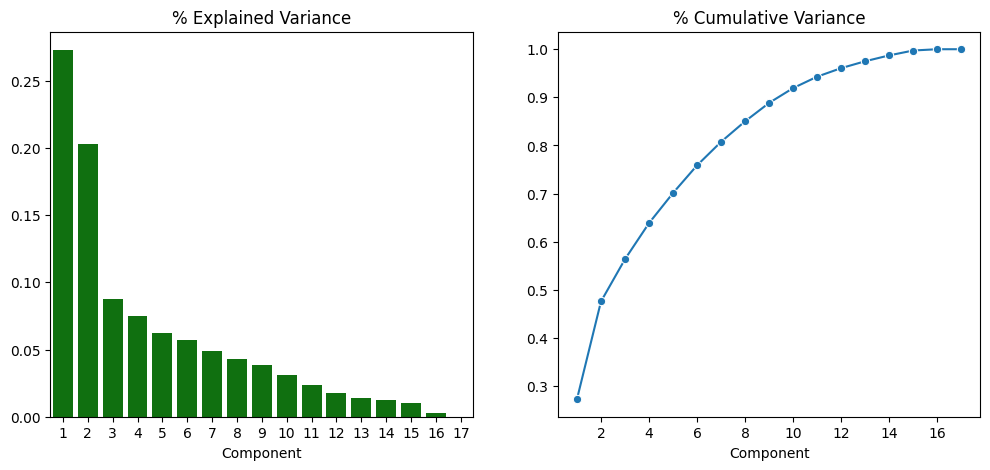

In [20]:
explained_vr = list(pca.explained_variance_ratio_)
explained_vr = sorted(explained_vr,reverse=True)
explained_vr_cum_sum= list(pca.explained_variance_ratio_.cumsum())
nums_components = [ z + 1 for z in range(X_pca.shape[1])]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = nums_components, y = explained_vr, ax = ax[0] , color='g')
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = nums_components, y = explained_vr_cum_sum, marker = 'o' ,ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

<li>Търсим най-малък брой измерения с най-голям explainded variance . Изглежда n=7 е такова число , като също така има и голяма комулативна дисперсия . Тоест взима 7те най- значещи компоненти , които събират информация за дисперсията от около 80% от оригиналното множество.</li>

In [21]:
X_pca_7 = PCA(n_components=7, random_state= 619).fit_transform(X)
X_pca_7 = pd.DataFrame(X_pca_7, columns=[f'PC{i+1}' for i in range(X_pca_7.shape[1])])
X_pca_7

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    -1.682233 -1.076140  0.487167  0.665749  0.017233  0.052778  0.829849
1    -1.138108  2.506541  0.600972 -0.117449  0.623656 -1.127356 -0.374275
2     0.969798 -0.383134  0.097826  1.210082 -2.172232 -0.252953 -1.569164
3    -0.873528  0.043478  1.457619  1.155083  0.296739 -0.117726 -0.275746
4    -1.599384 -0.688126  0.362483  0.990546 -0.487684  0.070382  0.707330
...        ...       ...       ...       ...       ...       ...       ...
8945 -0.359877 -2.016570 -0.988762 -2.727581  0.235292  2.676586 -1.534065
8946 -0.561493 -1.630906 -1.295878 -1.843868  0.164236  3.403424 -1.098255
8947 -0.926463 -1.811262 -0.468309 -2.281332  0.347112  2.982500 -1.376262
8948 -2.336708 -0.658259  0.979979 -1.858934  0.026617  3.174625 -0.940895
8949 -0.556627 -0.401125  1.021157 -1.954017 -1.299790  3.728567 -1.420216

[8950 rows x 7 columns]

<li>Но за целите на визуализацията ще тестваме с pca = 2</li>

In [22]:
X_pca_2 = PCA(n_components=2, random_state= 619).fit_transform(X)
X_pca_2 = pd.DataFrame(X_pca_2, columns=[f'PC{i+1}' for i in range(X_pca_2.shape[1])])
X_pca_2

PC1       PC2
0    -1.682233 -1.076147
1    -1.138110  2.506514
2     0.969792 -0.383145
3    -0.873531  0.043457
4    -1.599383 -0.688126
...        ...       ...
8945 -0.359876 -2.016571
8946 -0.561492 -1.630901
8947 -0.926462 -1.811262
8948 -2.336702 -0.658233
8949 -0.556625 -0.401094

[8950 rows x 2 columns]

In [23]:
X_pca_3 = PCA(n_components=3, random_state= 619).fit_transform(X)
X_pca_3 = pd.DataFrame(X_pca_3, columns=[f'PC{i+1}' for i in range(X_pca_3.shape[1])])
X_pca_3

PC1       PC2       PC3
0    -1.682233 -1.076145  0.487132
1    -1.138105  2.506553  0.601365
2     0.969799 -0.383131  0.097956
3    -0.873527  0.043477  1.457675
4    -1.599385 -0.688133  0.362390
...        ...       ...       ...
8945 -0.359879 -2.016582 -0.989001
8946 -0.561495 -1.630922 -1.296207
8947 -0.926465 -1.811275 -0.468567
8948 -2.336709 -0.658268  0.979725
8949 -0.556626 -0.401113  1.021268

[8950 rows x 3 columns]

**5.Клъстеризация**

*5.1 Kmeans*

In [24]:
pip install -U yellowbrick


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install setuptools


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

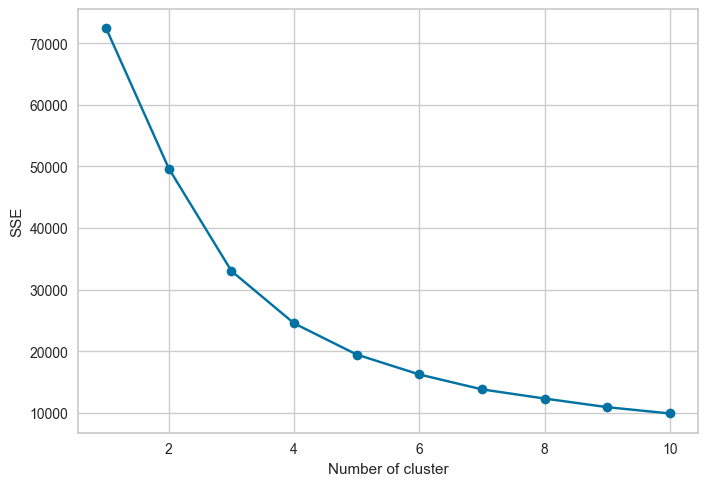

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

n_clusters = 10

inertias = []

for n_cluster in range(1 , n_clusters+1):

    kmeans= KMeans(n_cluster, random_state=619)

    kmeans.fit(X_pca_2)

    inertias.append(kmeans.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    

<li>Изглежда че по метода на лакътя k=4 е най-добрият брой клъстери , които можем да вземем за Kmeans</li>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

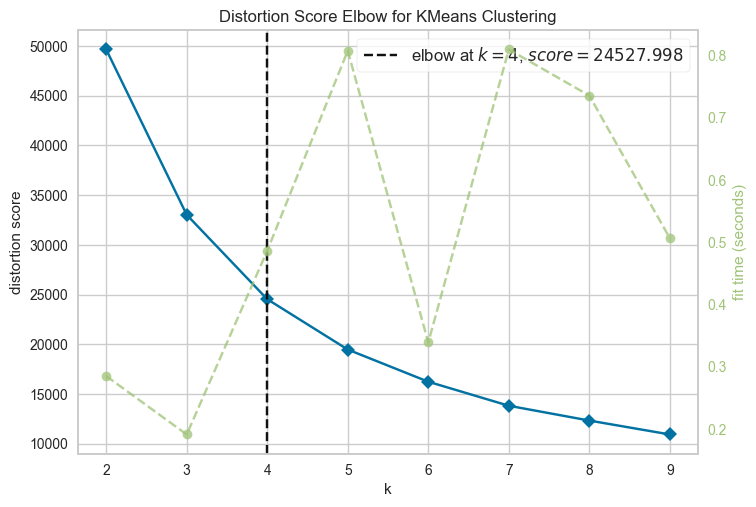

In [27]:
visualizer = KElbowVisualizer(KMeans(random_state=619), k=(2,10), metric='distortion')

visualizer.fit(X_pca_2) 
visualizer.finalize()      
visualizer.show();

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

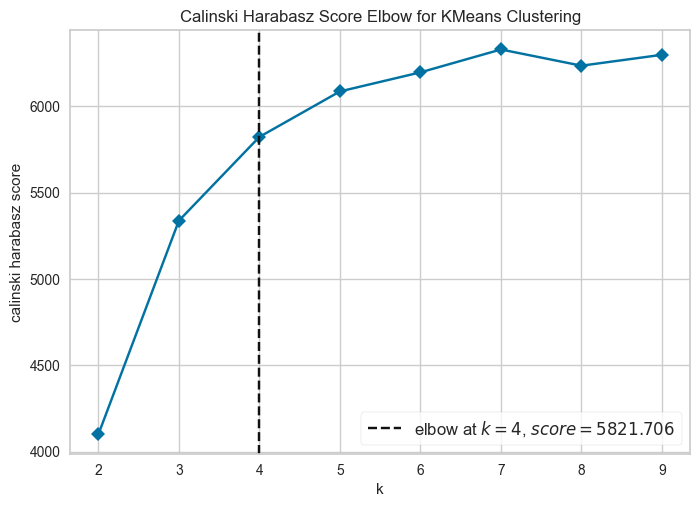

In [28]:
visualizer = KElbowVisualizer(KMeans(n_clusters=4,random_state=619), k=(2,10), metric='calinski_harabasz' , timings=False)

visualizer.fit(X_pca_2) 
visualizer.finalize()      
visualizer.show();


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

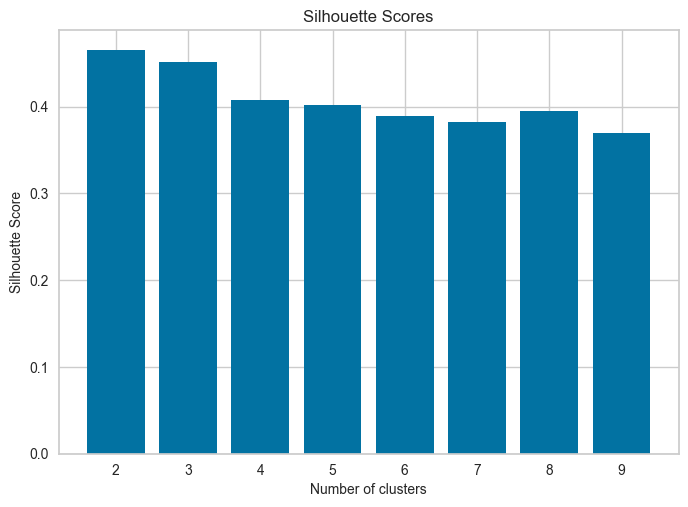

In [29]:
silhouette_scores = [] 

for n_cluster in range(2 , 10):

  kmeans = KMeans(n_cluster, random_state=619)

  labels = kmeans.fit_predict(X_pca_2)

  silhouette_scores.append(silhouette_score(X_pca_2, labels))
    
plt.bar(range(2 , 10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


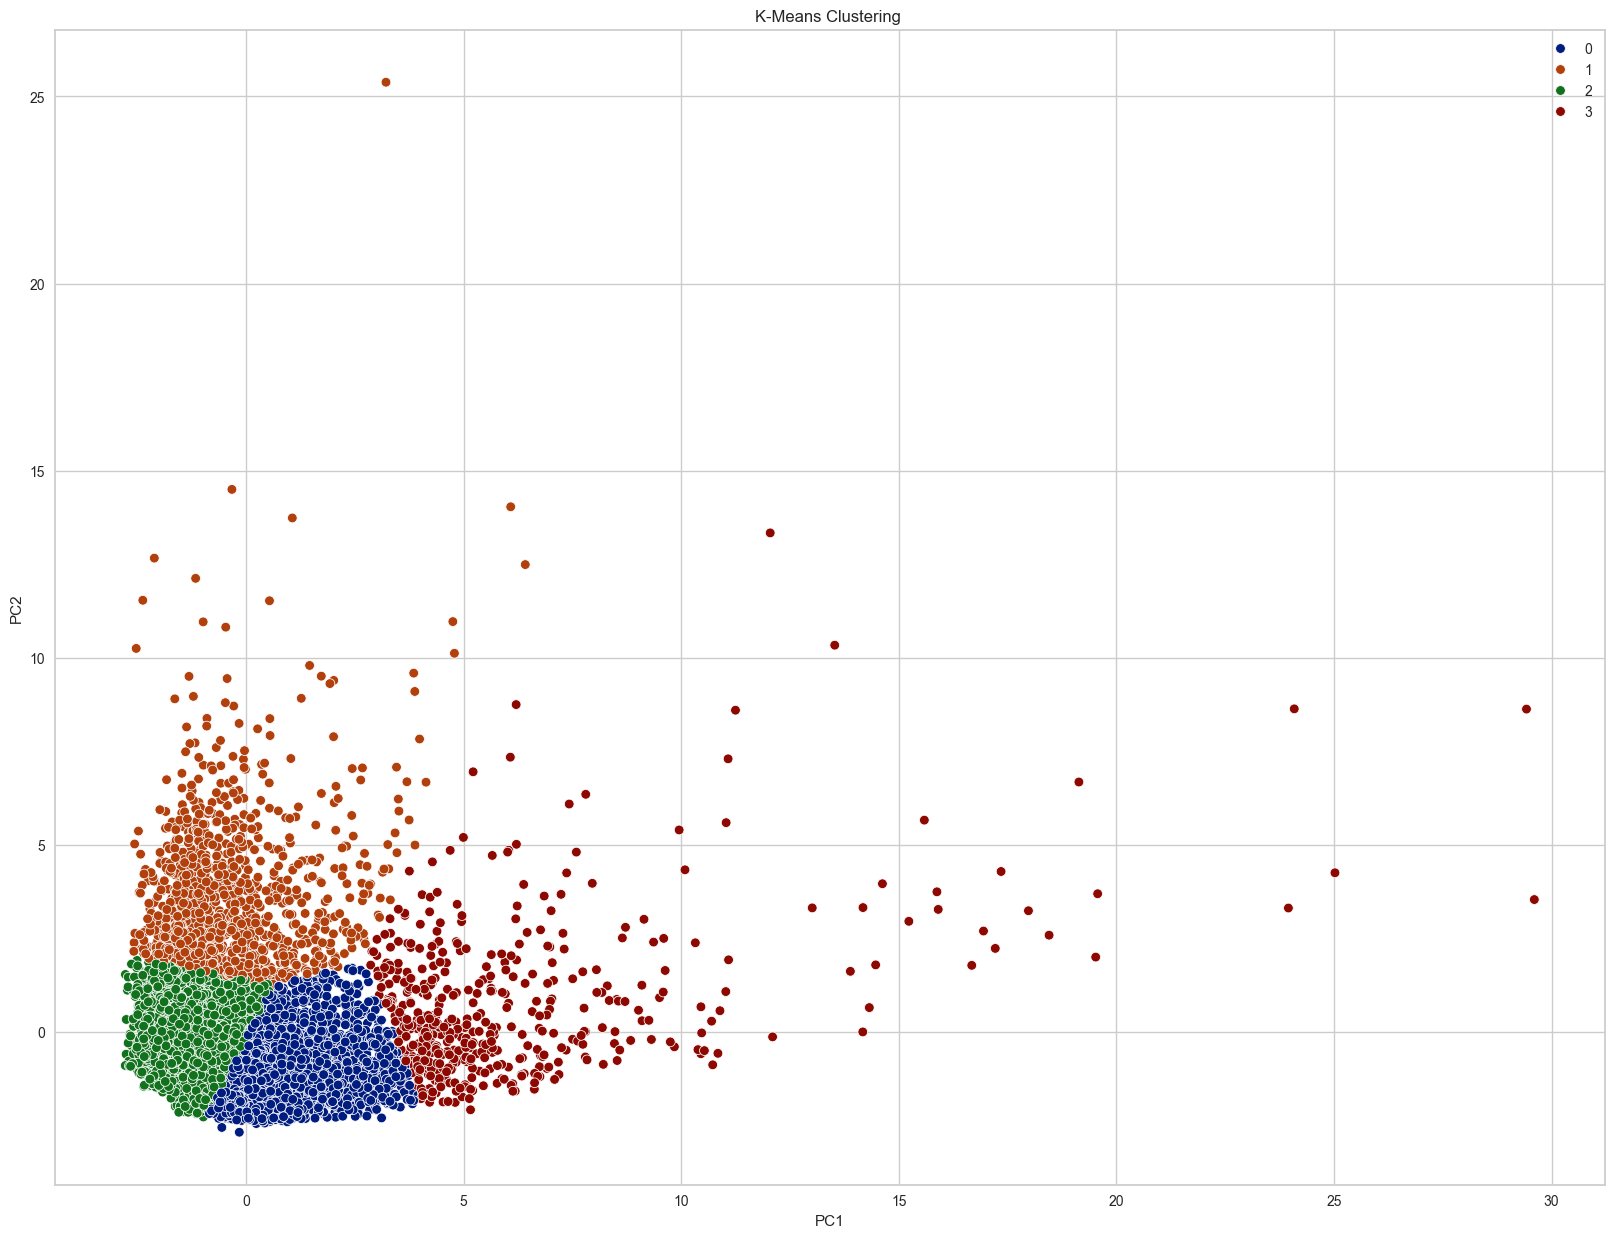

In [30]:
kmeans = KMeans(n_clusters = 4, random_state=619)

labels = kmeans.fit_predict(X_pca_2)

plt.figure(figsize=(20,15))

ax = sns.scatterplot(x= X_pca_2["PC1"], y= X_pca_2["PC2"], hue = labels, data = X_pca_2, palette='dark')
plt.title('K-Means Clustering ')
plt.show()

In [31]:
pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import plotly.express as px

kmeans = KMeans(n_clusters = 4, random_state=619)

labels = kmeans.fit_predict(X_pca_3)

plt.figure(figsize=(20,15))
fig = px.scatter_3d( X_pca_3, x= X_pca_3["PC1"], y= X_pca_3["PC2"], z = X_pca_3["PC3"] , color = labels);
fig.show();

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 2000x1500 with 0 Axes>

In [50]:
new = X_pca_2.to_numpy()
new

array([[-1.68223257, -1.07614655],
       [-1.13810971,  2.50651423],
       [ 0.96979157, -0.38314476],
       ...,
       [-0.92646221, -1.81126239],
       [-2.33670164, -0.65823273],
       [-0.55662459, -0.4010943 ]])

<class 'numpy.ndarray'>
Silhouette Coefficient: 0.321
Calinski-harbazs: 6371.197
Silhouette Coefficient: 0.819


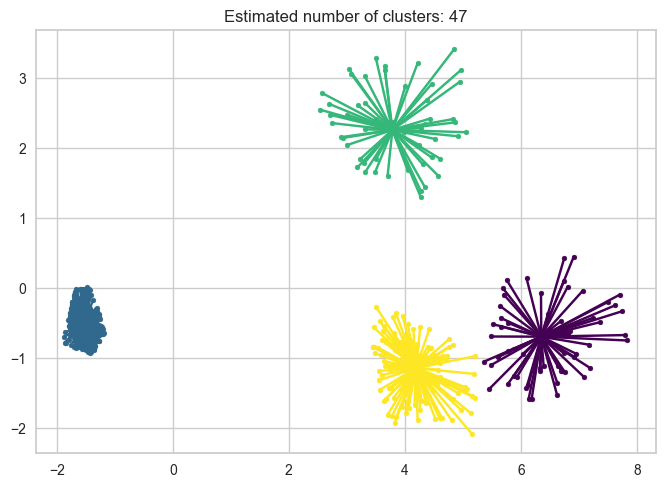

array([[-1.68223257, -1.07614655],
       [-1.13810971,  2.50651423],
       [ 0.96979157, -0.38314476],
       ...,
       [-0.92646221, -1.81126239],
       [-2.33670164, -0.65823273],
       [-0.55662459, -0.4010943 ]])

In [53]:
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import AffinityPropagation
print(type(X_pca_2))
plt.figure(figsize=(20,15))

af = AffinityPropagation(preference=-50,damping=0.9, random_state=0).fit(X_pca_2)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(
    "Silhouette Coefficient: %0.3f"
    % silhouette_score(X_pca_2, labels)
)
print(
    "Calinski-harbazs: %0.3f"
    % calinski_harabasz_score(X_pca_2, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % davies_bouldin_score(X_pca_2, labels)
)
colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_pca_2[cluster_centers_indices[k]]
    plt.scatter(
        X_pca_2[class_members, 0], X_pca_2[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X_pca_2[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
X_pca_2

In [55]:
for row in X_pca_2:
    if(row[0] >=10):
        print(f"x: {row[0]} and y : {row[1]}")

x: 19.140433753050367 and y : 6.678508668738878
x: 11.07962881480711 and y : 7.297335362875095
x: 10.326116157817431 and y : 2.38125314202918
x: 19.571232372559102 and y : 3.6919093780314625
x: 10.08834495075009 and y : 4.331730498758161
x: 24.08878984844864 and y : 8.63298876411132
x: 16.947889095877304 and y : 2.695377042947791
x: 11.02659972295379 and y : 1.0773188944344416
x: 29.425166993171196 and y : 8.62718779792086
x: 10.725753706486868 and y : -0.8798910485420767
x: 17.218400996133795 and y : 2.231809517376314
x: 14.174227442416637 and y : -0.000502512756488925
x: 11.089946922516605 and y : 1.9253747995677797
x: 11.24872164078828 and y : 8.597407293744594
x: 14.469872081155755 and y : 1.7906602745881912
x: 17.980817192713033 and y : 3.237657513012828
x: 16.6784690793737 and y : 1.7785612896916414
x: 29.60527886851484 and y : 3.5367779187372452
x: 10.845549376945772 and y : -0.5722910089191324
x: 14.625494680771675 and y : 3.959807502652651
x: 13.012480963608832 and y : 3.31391

In [58]:
for label in cluster_centers_indices:
    print(label)
print(len(cluster_centers_indices))

6
61
326
487
769
854
893
902
921
970
1059
1182
1258
1341
1604
1785
1851
2159
2180
2237
2384
2409
2897
3263
3373
3578
3609
3652
3726
4086
4314
4394
4437
4676
4927
5024
5079
5287
5728
5856
5860
5903
6929
7062
7137
8465
8593
47


In [34]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    scores = []
    scores.append(db_index)
    scores.append(s_score)
    scores.append(ch_index) 
    return scores

kmeans = KMeans(n_clusters = 4, random_state=619)

labels = kmeans.fit_predict(X_pca_2)

kmeans_scores = evaluate_clustering(X_pca_2, labels)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



*5.2 DBSCAN Clustering*

<li>Трябва да изберем подходящо eps за DBSCAN. Правим го с silhouette_score </li>

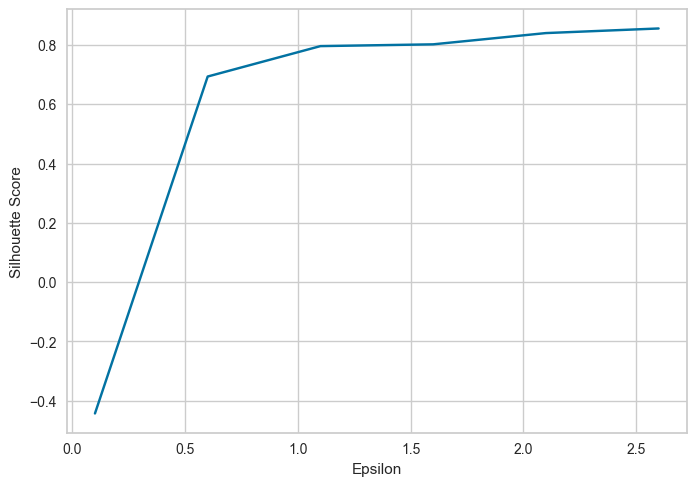

In [35]:
from sklearn.cluster import DBSCAN
silhouette_scores = []

step = 0.5
for epsilon in np.arange(0.1, 3, step):
    dbscan = DBSCAN(eps=epsilon)
    labels = dbscan.fit_predict(X_pca_2)
    silhouette_scores.append(silhouette_score(X_pca_2, labels))

plt.plot(np.arange(0.1, 3, step), silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

<li>Изглежда, че eps = 1.5 е подходящо. Понеже има досстатъчно висок silhouette_score , както и след него няма коренна разлика </li>

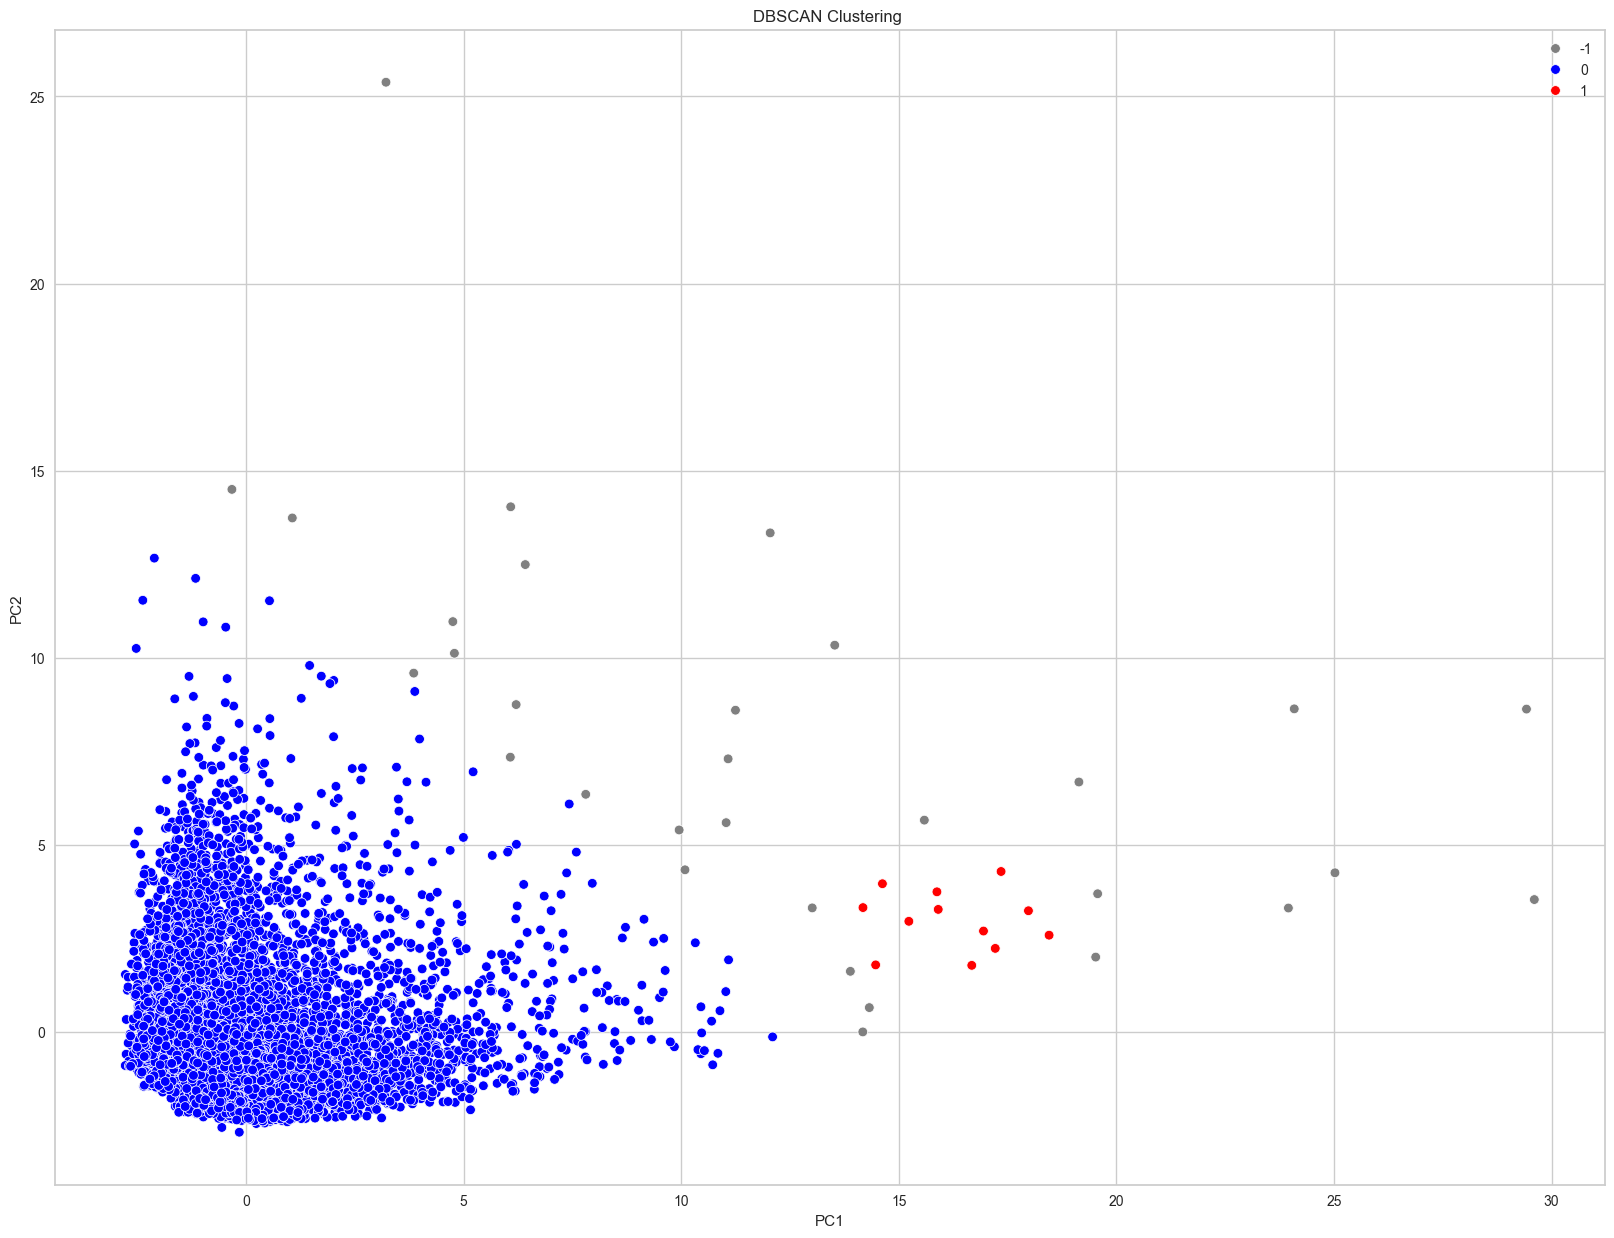

In [36]:
dbscan =DBSCAN(eps=1.5)
labels= dbscan.fit_predict(X_pca_2)

plt.figure(figsize=(20,15))

palette = ["gray", "blue", "red"]

# Class -1 is considered as outlier
ax = sns.scatterplot(x= X_pca_2["PC1"], y= X_pca_2["PC2"], hue = labels, data = X_pca_2, palette=palette)
plt.title('DBSCAN Clustering ')
plt.show()

In [37]:

dbscan = DBSCAN(eps=1.5)
labels= dbscan.fit_predict(X_pca_2)

dbscan_scores = evaluate_clustering(X_pca_2, labels)

*5.3 Hierarchical Clustering (Agglomerative) Clustering*

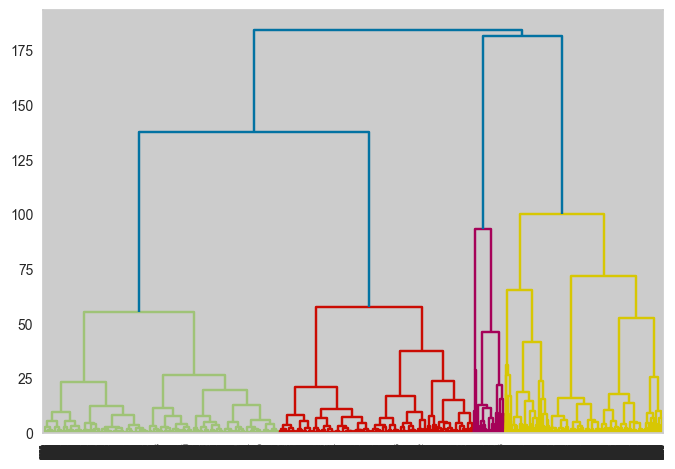

In [38]:
import sys
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram



mergings_c = linkage(X_pca_2, method="ward", metric='euclidean')
dendrogram(mergings_c)
plt.show() # it could take some time (around 2 min)

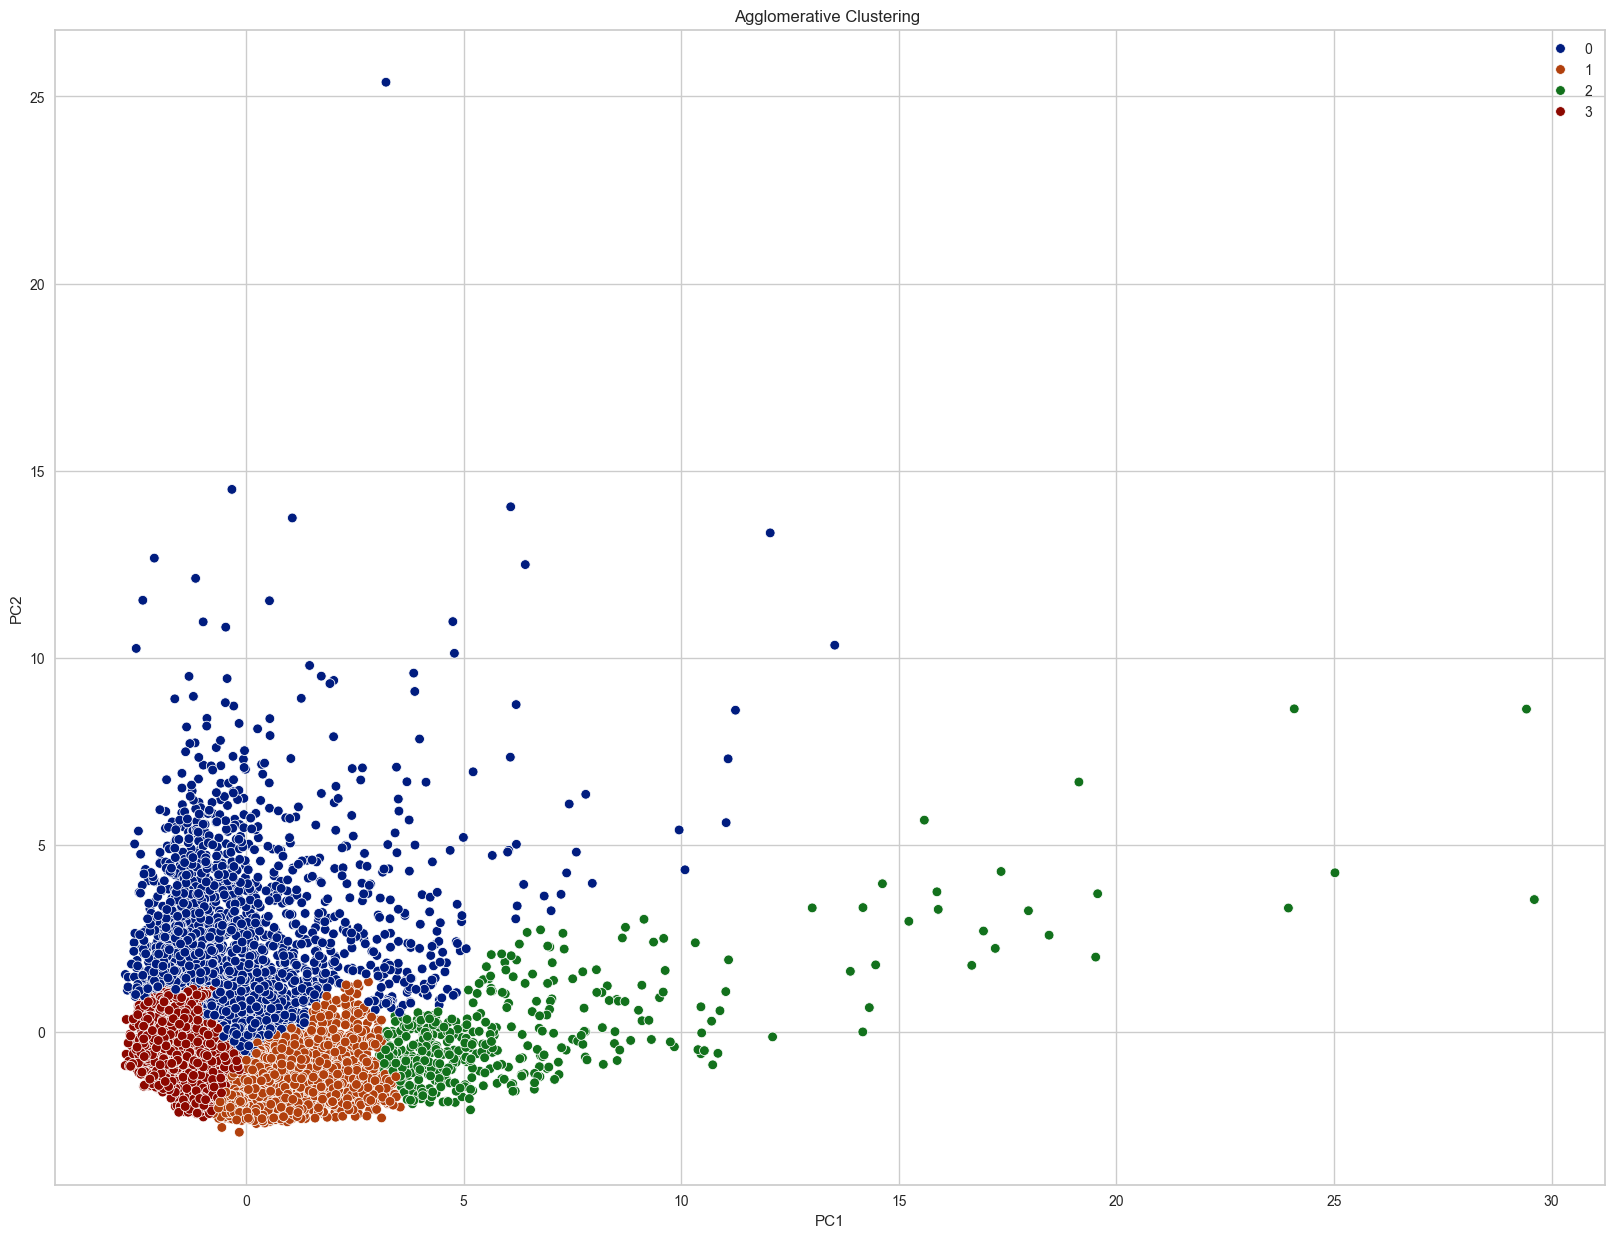

In [39]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=4)
labels= agglomerative.fit_predict(X_pca_2)

plt.figure(figsize=(20,15))

ax = sns.scatterplot(x= X_pca_2["PC1"], y= X_pca_2["PC2"], hue = labels, data = X_pca_2, palette='dark')
plt.title('Agglomerative Clustering ')
plt.show()

In [40]:
agglomerative = AgglomerativeClustering(n_clusters=4)
labels= agglomerative.fit_predict(X_pca_3)

plt.figure(figsize=(20,15))
fig = px.scatter_3d( X_pca_3, x= X_pca_3["PC1"], y= X_pca_3["PC2"], z = X_pca_3["PC3"] , color = labels)
fig.show();

<Figure size 2000x1500 with 0 Axes>

In [41]:
agglo_scores= evaluate_clustering(X_pca_2,labels)

print("{} \n {} \n {} \n".format(kmeans_scores,dbscan_scores,agglo_scores))


[0.801, 0.408, 5821.706] 
 [1.305, 0.801, 724.506] 
 [0.847, 0.338, 4559.192] 



**6.Оценяване на моделите**

In [42]:
final_results = pd.DataFrame( {
        'metric' : ['distortion' , 'silhouette', 'calinski_harabasz' ],
        'kmeans' : kmeans_scores,
        'dbscan' : dbscan_scores,
        'agglomerative' : agglo_scores,
})
final_results

metric    kmeans   dbscan  agglomerative
0         distortion     0.801    1.305          0.847
1         silhouette     0.408    0.801          0.338
2  calinski_harabasz  5821.706  724.506       4559.192

<i>Спрямо резултатите виждаме , че спрямо distortion , kMeans бие другите по-резултат защото има най- малък резултат , а distortion е такава метрика при , която колкото по-малък резултат имаме, означава че клъстерите са разделени относително добре и няма голямо количество на презастъпване ( overlapping ). </i>

<i>Спрямо silhouette , dbscan бие другите по-резултат защото има най- висок резултат , а silhouette е такава метрика при , която колкото по-голям резултат имаме, означава че средно отношението на всяка една точка спрямо своя клъстер и външните клъстери е толкова по-голямо, а ние точно това търсим. Хубаво разделяне на клъстерите. </i>


<i>Спрямо calinski_harabasz , kmeans отново бие другите по-резултат защото има най- висок резултат , а calinski_harabasz е такава метрика ,при  която колкото по-голям резултат имаме, означава че клъстерите са се разделили възможно по-добре </i>

**Като заключение можем да кажем , че kMeans се справя най-добре и това е алгоритъма , който ще изберем**  :)

**7.Категоризация**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/tv/6hngdm6d0y15lpfxpn7rlmp40000gn/T/ipykernel_53451/3911724821.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/tv/6hngdm6d0y15lpfxpn7rlmp40000gn/T/ipykernel_53451/3911724821.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/tv/6hngdm6d0y15lpfxpn7rlmp40000gn/T/ipykernel_53451/3911724821.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

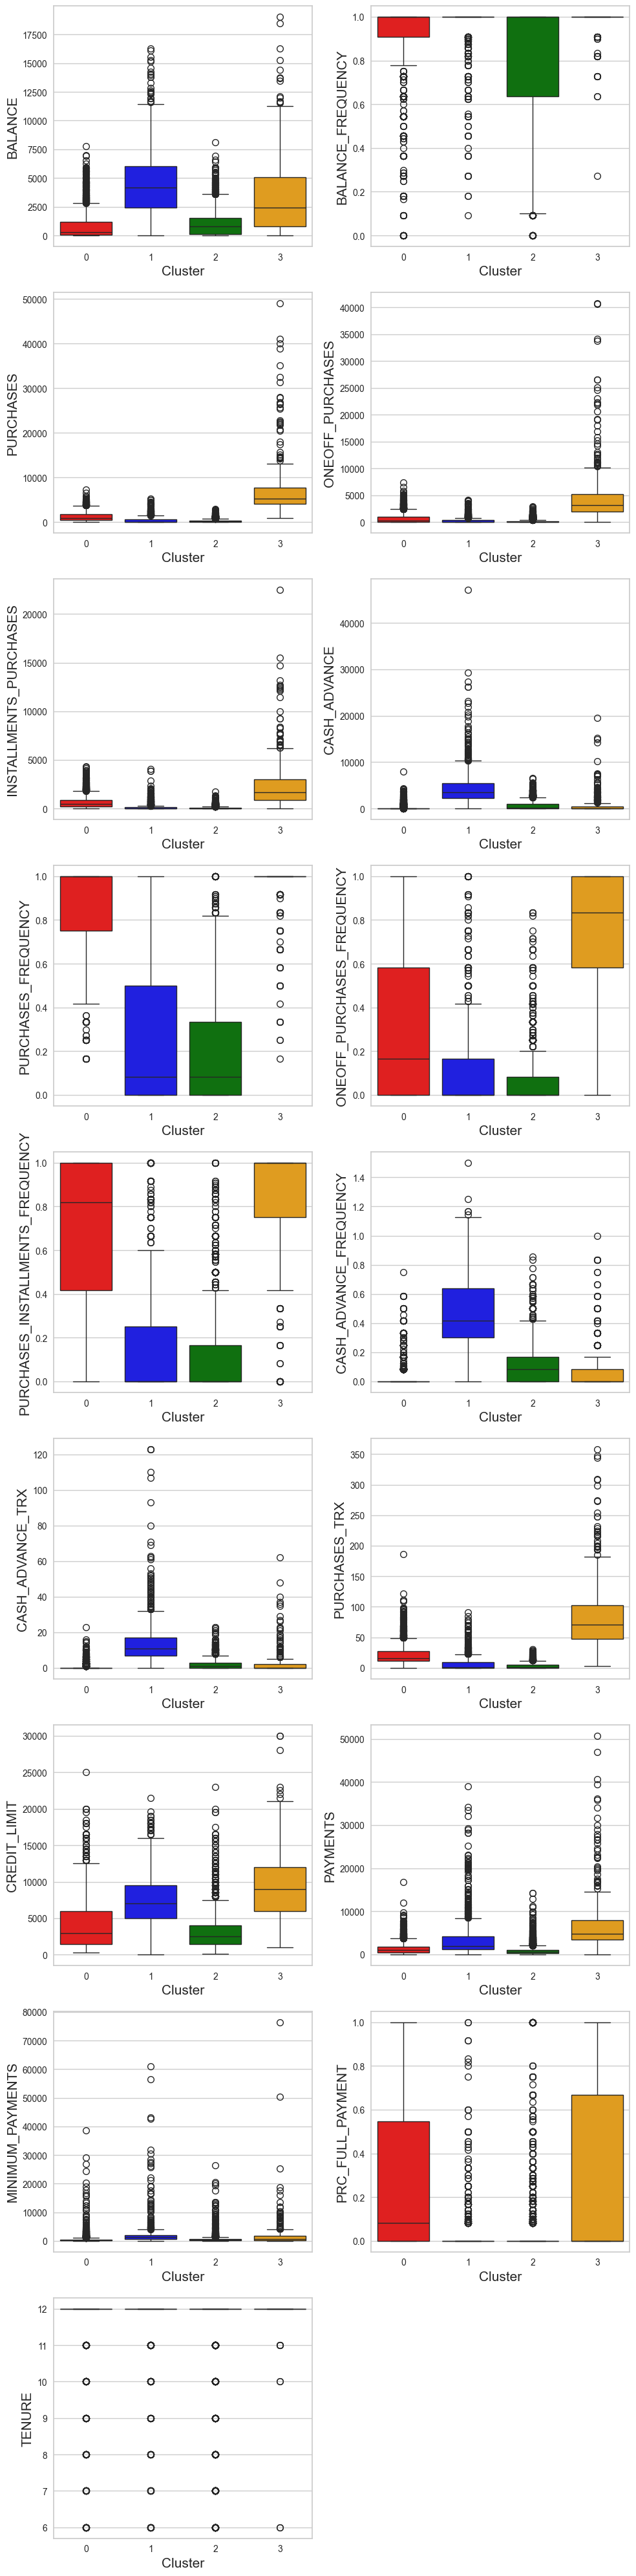

In [43]:
clusters=kmeans.fit_predict(X_pca_2)
data['Cluster']= clusters

plt.figure(figsize = (10, 40))
for i, col in enumerate(data.columns[:-1]):
    ax = plt.subplot(9, 2, i+1)
    sns.boxplot(x = data['Cluster'], y = data[col],palette=['red','blue','green','orange'])
    plt.xlabel("Cluster", fontsize = 15)
    plt.ylabel(col, fontsize = 15)


plt.tight_layout()
plt.show()

**Разделяме нашите потребители на 4ри групи**
<ul>
<li>
    Категория 0. <br/> Имат сравнително нисък баланс, правят много ниски минимални плащания, но сравнително често използват своята карта. (<i>students credit card holders</i>)
</li>
<li>
    Категория 1. <br/> Имат най-голям баланс, те са хората които най-често плащат в аванс (cash_advance),  имат сравнитлно висок кредитен лимит. (<i>cash_advance credit card holders</i>)
</li>
<li>
    Категория 2. <br/> Имат сравнително висок баланс, правят най-скъпите плащания, както и най-скъпите еднократни плащания, имат най-голям кредитен лимит. Както и правят installments payments най-често и най - мноого (<i>installments credit card holders</i>)
</li>
<li>
    Категория 3. <br/> Имат нисък баланс , пазаруват често на изплащане , но и правят най-големите цели плащания  (<i>full payers credit card holders</i>)
</li>
</ul>

**8. Заключение и бъдещо развитие**

<i>Като заключение от тестванията можем да кажем , че kMeans се справи най-добре от тестваните алгоритми като ни категоризира носителите на кредитни карти в 4 категории (students, cash_advance credit card holders, installments credit card holders, full payers card holders) , оценихме нашите алгоритми с 3 метрики (distortion, silhouette, calinski_harabasz) </i>

<i>Като бъдещо развитие:
    <ul>
    <li>
        Може да се измисли по-добро справяне с outlier-ите отколкото сега , така че да се изчисляват спрямо някакви закономерностти.
    </li>
    <li>
        Може да се пробва да се намали размерността до n=7 с pca и след това да се използва tsne за намаляне до n=2 и да се проверят резултатите.
    </li>
    <li>
    Да се използват Agglomerative/DBSCAN с параметър матрица на разстоянията на Gower (метрика подходяща за числовите характеристики)
    </li>
    </ul>
</i>